#Impoting the required packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Importing the dataset

In [32]:
data = pd.read_csv('Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250527.csv')

#Dataset Pre-processing

In [33]:
data.head(10)

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0
5,31/01/2020,12977,9620,242,19327,0,0.0
6,01/03/2023,17387,11627,362,21753,5544,108.0
7,17/07/2021,2735,3651,0,5236,0,20.0
8,07/03/2023,17674,11859,364,21560,5700,91.0
9,12/11/2020,13405,6989,273,13688,4983,74.0


In [34]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.sort_values('Date', inplace=True)
data.set_index('Date', inplace=True)

In [36]:
data.describe()
data.shape
data.count
data.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1918 entries, 2019-07-01 to 2024-09-29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Local Route   1918 non-null   int64  
 1   Light Rail    1918 non-null   int64  
 2   Peak Service  1918 non-null   int64  
 3   Rapid Route   1918 non-null   int64  
 4   School        1918 non-null   int64  
 5   Other         1898 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 104.9 KB


In [37]:
data.duplicated().sum()


np.int64(0)

In [38]:
data.isnull().sum()


,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,20


In [39]:
data['Other'].fillna(data['Other'].median(), inplace=True)

In [40]:
print(data.describe())

        Local Route    Light Rail  Peak Service   Rapid Route       School  \
count   1918.000000   1918.000000   1918.000000   1918.000000  1918.000000   
mean    9891.395203   7195.446298    179.581335  12597.213243  2352.694995   
std     6120.715714   3345.616428    156.532738   6720.494557  2494.766306   
min        1.000000      0.000000      0.000000      0.000000     0.000000   
25%     3044.500000   4463.500000      0.000000   6383.000000     0.000000   
50%    11417.000000   7507.000000    193.000000  13106.500000   567.500000   
75%    15517.500000  10008.250000    313.750000  17924.750000  4914.000000   
max    21070.000000  15154.000000   1029.000000  28678.000000  7255.000000   

             Other  
count  1918.000000  
mean     43.355057  
std      41.529968  
min       0.000000  
25%      15.000000  
50%      40.000000  
75%      67.750000  
max    1105.000000  


#Retriving the Insights

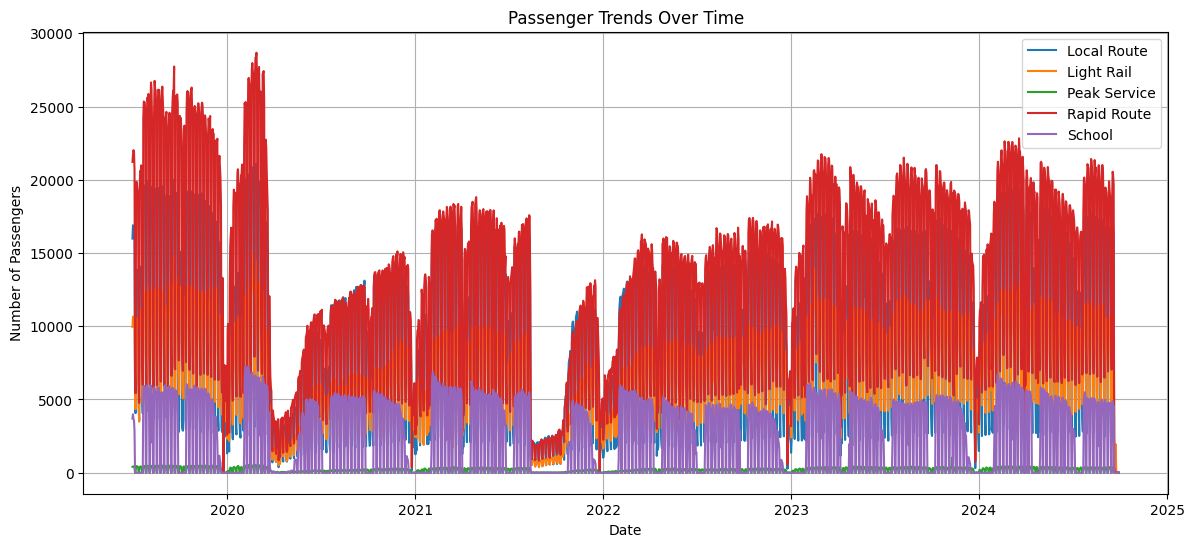

In [41]:
plt.figure(figsize=(14, 6))
for col in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']:
    plt.plot(data.index, data[col], label=col)
plt.title("Passenger Trends Over Time")
plt.ylabel("Number of Passengers")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()

# 5 Key Insights:
# 1. Light Rail and Rapid Route show consistent daily usage.
# 2. School and Peak Service often show 0 values (likely non-operational on weekends).
# 3. Missing values are only in the 'Other' column (~1%) and were filled.
# 4. Local Route shows the highest variance in daily counts.
#5. No strong seasonal trend observed; short-term fluctuations are visible.